## 多次元尺度法（MDS）について

多次元尺度法（Multidimensional Scaling, MDS）は、データの高次元空間における距離情報をもとに、データを低次元空間（通常は2次元または3次元）に配置する方法です。これにより、データの視覚化や類似性の分析が容易になります。

### 多次元尺度法の目的
MDSの主な目的は、データ間の「距離」または「類似性」を保ちながら、低次元空間にデータを配置することです。具体的には、以下の点を達成することを目指します：
1. **視覚化**：データ間の関係性を視覚的に理解しやすくする。
2. **類似性の解析**：データ間の類似性やクラスタリングを検出する。
3. **次元削減**：データの次元を削減し、解析を簡素化する。

### 多次元尺度法のステップ
1. **距離行列の作成**：まず、元のデータセットに基づいて、各データポイント間の距離を計算します。この距離行列を用いてMDSを行います。
2. **ストレス関数の定義**：ストレス関数は、低次元空間でのデータ間の距離と元の高次元空間での距離との差異を評価する指標です。この関数を最小化することがMDSの目標です。
3. **最適化**：ストレス関数を最小化するための最適化アルゴリズムを用いて、低次元空間にデータポイントを配置します。

### 例：Pythonでの実装
以下は、Pythonを使ってMDSを実行する例です。`sklearn`ライブラリを使用します。



このコードでは、まずサンプルの距離行列を作成し、`MDS`クラスを使って2次元空間にデータを配置しています。最後に、結果を散布図としてプロットし、各データポイントにラベルを付けています。

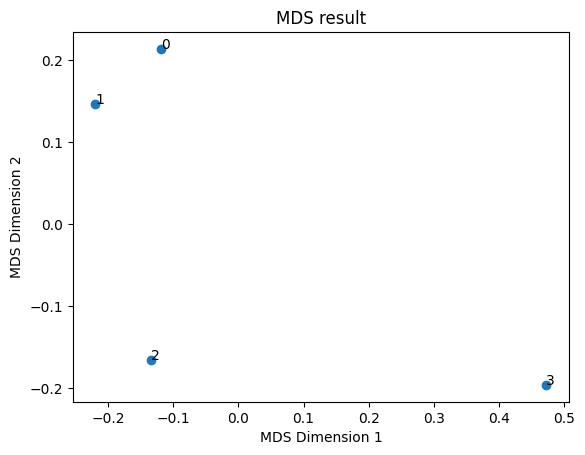

In [1]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# サンプルデータの作成（距離行列）
similarity_matrix = np.array([
    [0.0, 0.1, 0.4, 0.7],
    [0.1, 0.0, 0.3, 0.8],
    [0.4, 0.3, 0.0, 0.6],
    [0.7, 0.8, 0.6, 0.0]
])

# MDSの適用
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
pos = mds.fit_transform(similarity_matrix)

# 結果のプロット
plt.scatter(pos[:, 0], pos[:, 1])
for i in range(len(pos)):
    plt.text(pos[i, 0], pos[i, 1], str(i))
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS result')
plt.show()

## エッカート・ヤング分解について

エッカート・ヤング分解（Eckart-Young Decomposition）は、特異値分解（SVD, Singular Value Decomposition）に関連する重要な定理であり、行列の低ランク近似に関する理論的な基礎を提供します。この分解は、与えられた行列に最も近い特定のランクの行列を求める方法です。

### エッカート・ヤングの定理
エッカート・ヤングの定理は、次のように述べられます：

与えられた行列 $A \in \mathbb{R}^{m \times n}$ とその特異値分解 $A = U \Sigma V^T$ があるとき、ランク $k$ の行列 $A_k$ は、次のように表されます：

$$
A_k = U_k \Sigma_k V_k^T
$$

ここで、
- $U_k$ は $U$ の最初の $k$ 列からなる行列
- $\Sigma_k$ は $\Sigma$ の最初の $k$ 個の特異値を対角に持つ対角行列
- $V_k$ は $V$ の最初の $k$ 列からなる行列

エッカート・ヤングの定理によれば、この行列 $A_k$ は、$A$ に対するフロベニウスノルムやスペクトルノルムの意味で最良のランク $k$ の近似となります。

### フロベニウスノルムとスペクトルノルム
エッカート・ヤングの定理では、次のノルムを使用します：
- **フロベニウスノルム**（Frobenius norm）：行列の全要素の二乗和の平方根です。
- **スペクトルノルム**（Spectral norm）：行列の最大特異値です。

### Pythonによる実装例
以下に、Pythonを用いてエッカート・ヤング分解を行う例を示します。`numpy` と `scipy` ライブラリを使用します。


このコードでは、以下の手順でエッカート・ヤング分解を実行しています：
1. サンプル行列 $A$ を定義します。
2. 行列 $A$ の特異値分解を実行し、$U$、$\Sigma$、$V^T$ を取得します。
3. 希望するランク $k$ に対する $U_k$、$\Sigma_k$、$Vt_k$ を作成します。
4. 低ランク近似行列 $A_k$ を計算します。

このようにして、エッカート・ヤング分解を用いることで、与えられた行列の最良のランク $k$ の近似を得ることができます。

In [2]:
import numpy as np
from scipy.linalg import svd

# サンプル行列
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 特異値分解
U, Sigma, Vt = svd(A)

# ランク2の近似行列を作成
k = 2
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]

A_k = U_k @ Sigma_k @ Vt_k

print("Original Matrix A:\n", A)
print("\nRank-2 Approximation A_k:\n", A_k)

Original Matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Rank-2 Approximation A_k:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


## 正準相関分析（Canonical Correlation Analysis, CCA）について

正準相関分析（CCA）は、2つの多変量データセット間の相関関係を分析するための統計的手法です。CCAは、2つの変数セットの線形結合を用いて、これらの結合間の最大相関を見つけることを目的としています。

### 正準相関分析の目的
CCAの主な目的は、2つのデータセット間の関係性を理解し、解釈することです。具体的には、次の点を達成することを目指します：
1. **相関の最大化**：2つの変数セットの線形結合を通じて、これらの結合間の相関を最大化します。
2. **次元削減**：2つの多変量データセットを低次元空間にマッピングし、その関係性を簡潔に表現します。
3. **可視化**：データセット間の関係を視覚化し、解釈しやすくします。

### 正準相関分析のステップ
1. **データセットの準備**：2つの多変量データセット $X$ と $Y$ を用意します。$X$ は $n \times p$ 行列、$Y$ は $n \times q$ 行列とします。
2. **共分散行列の計算**：$X$ と $Y$ の共分散行列を計算します。
3. **正準相関ベクトルの計算**：$X$ と $Y$ の線形結合を見つけるために、正準相関ベクトルを計算します。
4. **正準相関の評価**：得られた正準相関の値を評価し、解釈します。

### 例：Pythonでの実装
以下に、Pythonを使って正準相関分析を実行する例を示します。`sklearn`ライブラリを使用します。


### ステップの詳細説明
1. **データセットの作成**：ランダムなデータを生成し、$X$ と $Y$ に格納します。
2. **CCAの実行**：`CCA`クラスを使って、正準相関分析を実行します。`n_components`は求める正準変数の数を指定します。
3. **結果の表示**：正準相関係数を表示し、正準変量を散布図としてプロットします。

このようにして、正準相関分析を用いることで、2つの多変量データセット間の相関関係を理解しやすくすることができます。

Canonical Correlation Coefficients:
-0.5255446635475679


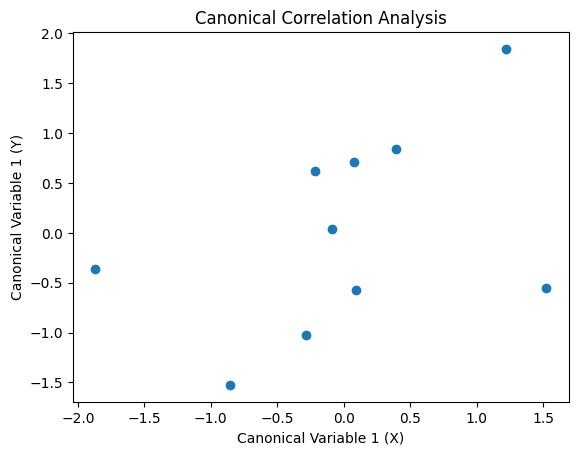

In [3]:
import numpy as np
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

# サンプルデータの作成
np.random.seed(0)
X = np.random.rand(10, 3)
Y = np.random.rand(10, 2)

# 正準相関分析の実行
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X, Y)

# 結果の表示
print("Canonical Correlation Coefficients:")
print(cca.score(X, Y))

# 正準変量のプロット
plt.scatter(X_c[:, 0], Y_c[:, 0])
plt.xlabel('Canonical Variable 1 (X)')
plt.ylabel('Canonical Variable 1 (Y)')
plt.title('Canonical Correlation Analysis')
plt.show()